In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_cc = pd.read_excel('cc61_df3_vn.xlsx')
df_xray = pd.read_excel('Xray (2017-2018).xlsx')

In [3]:
# dropping null value columns to avoid errors
df_cc.dropna(subset=['clean_symptom2(synonym)', 'bps', 'bpd', 'pulse', 'bw', 'height'],inplace = True)
df_cc.head()

,vn,vstdate,vsttime,sex,age_y,cc,bps,bpd,pulse,bw,height,temperature,department,PDX (1),Comorbidity (2),Complication (3),Other (4),External Cause (5),clean_symtom(noun),clean_symptom2(synonym)
0,610611111904,2018-06-11,11:19:04,หญิง,23.0,P - LAST - LMP 23/03/02561* 4 วัน ตั้งครร...,86.0,59.0,85.0,49.4,160.0,36.5,จุดซักประวัติห้องตรวจโรคนรีเวช,O020,NaN,NaN,NaN,NaN,ใช้สารเสพติด ตั้งครรภ์,ตั้งครรภ์/ยาเสพติด
1,610508143131,2018-05-08,14:31:31,หญิง,22.0,G1P 0 LAST- ปี LMP - คุมกำเนิด - วันนี...,123.0,72.0,130.0,61.1,165.0,36.5,จุดซักประวัติห้องตรวจโรคนรีเวช,A630,NaN,NaN,Z133,NaN,ฝากครรภ์ คุมกำเนิด ตั้งครรภ์,ฝากครรภ์/ตั้งครรภ์/กำเนิด
2,601101191449,2017-11-01,19:14:49,หญิง,51.0,รับจาก ER เวลา 19.32 น มีไข้ ไอมีเสมหะ ป...,175.0,99.0,114.0,0.0,156.0,38.5,คลินิกนอกเวลา1,J110,NaN,NaN,NaN,NaN,ปวดศีรษะ ชา ไข้ ไอ เสมหะ,ไข้/ไอ/ปวดศีรษะ/ชา/ปวด/เสมหะ
3,610926001048,2018-09-26,00:10:48,หญิง,52.0,ผู้ป่วยแจ้งว่า มีอาการปวดท้อง แน่นใต้ลิ้นปี่ เ...,170.0,110.0,64.0,86.0,154.0,36.6,ห้องEmergency Room (ER),K30,NaN,NaN,NaN,NaN,แน่นใต้ลิ้นปี่ ปวดท้อง,ปวด/แน่น/ปวดท้อง/แน่นใต้ลิ้นปี่
6,610326142345,2018-03-26,14:23:45,หญิง,51.0,ปวดขาพับข้างซ้ายร้าวลงขาซ้ายเป็นมา 1 อาทิตย์,153.0,92.0,67.0,86.0,154.0,36.5,จุดซักประวัติห้องตรวจโรคกระดูก,M6596,NaN,NaN,NaN,NaN,ร้าว ปวดขา,ปวด/ปวดร้าว/ปวดขา


In [4]:
df_xray['xray_items'] = df_xray['xray_list'].str.split(",", n= -1)
df_xray.head()

,vn,vstdate,vsttime,xray_items_code,xray_list,xray_items
0,601001011504,2017-10-01,01:15:04,12.0,Chest Ap,[Chest Ap]
1,601001011504,2017-10-01,01:15:04,66.0,Chest Ap,[Chest Ap]
2,601001011504,2017-10-01,01:15:04,66.0,Chest Ap,[Chest Ap]
3,601001012739,2017-10-01,01:27:39,1.0,"Skull AP,lat,Ankle Lt AP,lat,Ankle Mortise Lt","[Skull AP, lat, Ankle Lt AP, lat, Ankle Mortis..."
4,601001012739,2017-10-01,01:27:39,59.0,"Skull AP,lat,Ankle Lt AP,lat,Ankle Mortise Lt","[Skull AP, lat, Ankle Lt AP, lat, Ankle Mortis..."


In [5]:
df_cc['symptoms'] = df_cc['clean_symptom2(synonym)'].str.split("/", n= -1)
df_cc.head()

,vn,vstdate,vsttime,sex,age_y,cc,bps,bpd,pulse,bw,...,temperature,department,PDX (1),Comorbidity (2),Complication (3),Other (4),External Cause (5),clean_symtom(noun),clean_symptom2(synonym),symptoms
0,610611111904,2018-06-11,11:19:04,หญิง,23.0,P - LAST - LMP 23/03/02561* 4 วัน ตั้งครร...,86.0,59.0,85.0,49.4,...,36.5,จุดซักประวัติห้องตรวจโรคนรีเวช,O020,NaN,NaN,NaN,NaN,ใช้สารเสพติด ตั้งครรภ์,ตั้งครรภ์/ยาเสพติด,"[ตั้งครรภ์, ยาเสพติด]"
1,610508143131,2018-05-08,14:31:31,หญิง,22.0,G1P 0 LAST- ปี LMP - คุมกำเนิด - วันนี...,123.0,72.0,130.0,61.1,...,36.5,จุดซักประวัติห้องตรวจโรคนรีเวช,A630,NaN,NaN,Z133,NaN,ฝากครรภ์ คุมกำเนิด ตั้งครรภ์,ฝากครรภ์/ตั้งครรภ์/กำเนิด,"[ฝากครรภ์, ตั้งครรภ์, กำเนิด]"
2,601101191449,2017-11-01,19:14:49,หญิง,51.0,รับจาก ER เวลา 19.32 น มีไข้ ไอมีเสมหะ ป...,175.0,99.0,114.0,0.0,...,38.5,คลินิกนอกเวลา1,J110,NaN,NaN,NaN,NaN,ปวดศีรษะ ชา ไข้ ไอ เสมหะ,ไข้/ไอ/ปวดศีรษะ/ชา/ปวด/เสมหะ,"[ไข้, ไอ, ปวดศีรษะ, ชา, ปวด, เสมหะ]"
3,610926001048,2018-09-26,00:10:48,หญิง,52.0,ผู้ป่วยแจ้งว่า มีอาการปวดท้อง แน่นใต้ลิ้นปี่ เ...,170.0,110.0,64.0,86.0,...,36.6,ห้องEmergency Room (ER),K30,NaN,NaN,NaN,NaN,แน่นใต้ลิ้นปี่ ปวดท้อง,ปวด/แน่น/ปวดท้อง/แน่นใต้ลิ้นปี่,"[ปวด, แน่น, ปวดท้อง, แน่นใต้ลิ้นปี่]"
6,610326142345,2018-03-26,14:23:45,หญิง,51.0,ปวดขาพับข้างซ้ายร้าวลงขาซ้ายเป็นมา 1 อาทิตย์,153.0,92.0,67.0,86.0,...,36.5,จุดซักประวัติห้องตรวจโรคกระดูก,M6596,NaN,NaN,NaN,NaN,ร้าว ปวดขา,ปวด/ปวดร้าว/ปวดขา,"[ปวด, ปวดร้าว, ปวดขา]"


In [28]:
df_cc.rename(columns={'PDX (1)': 'PDX'}, inplace=True)

In [29]:
df_cc_new = df_cc[['vn', 'sex', 'age_y', 'bps', 'bpd', 'pulse', 'bw', 'height', 'temperature', 'PDX', 'symptoms']]
df_cc_new.head()

,vn,sex,age_y,bps,bpd,pulse,bw,height,temperature,PDX,symptoms
0,610611111904,หญิง,23.0,86.0,59.0,85.0,49.4,160.0,36.5,O020,"[ตั้งครรภ์, ยาเสพติด]"
1,610508143131,หญิง,22.0,123.0,72.0,130.0,61.1,165.0,36.5,A630,"[ฝากครรภ์, ตั้งครรภ์, กำเนิด]"
2,601101191449,หญิง,51.0,175.0,99.0,114.0,0.0,156.0,38.5,J110,"[ไข้, ไอ, ปวดศีรษะ, ชา, ปวด, เสมหะ]"
3,610926001048,หญิง,52.0,170.0,110.0,64.0,86.0,154.0,36.6,K30,"[ปวด, แน่น, ปวดท้อง, แน่นใต้ลิ้นปี่]"
6,610326142345,หญิง,51.0,153.0,92.0,67.0,86.0,154.0,36.5,M6596,"[ปวด, ปวดร้าว, ปวดขา]"


In [30]:
df_xray_new = df_xray[['vn', 'xray_items']]
df_xray_new.head()

,vn,xray_items
0,601001011504,[Chest Ap]
1,601001011504,[Chest Ap]
2,601001011504,[Chest Ap]
3,601001012739,"[Skull AP, lat, Ankle Lt AP, lat, Ankle Mortis..."
4,601001012739,"[Skull AP, lat, Ankle Lt AP, lat, Ankle Mortis..."


In [31]:
# Find distinct symptoms
te = TransactionEncoder()
dataset = df_cc_new['symptoms']
te_ary = te.fit(dataset).transform(dataset)
te_ary.astype("int")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
len(te.columns_)

328

In [33]:
type(df_cc_new['PDX'][1])

str

In [34]:
len(df_cc_new.PDX.unique())

5220

In [36]:
df = pd.merge(df_cc_new, df_xray_new, how='inner', on='vn')
df.head()

,vn,sex,age_y,bps,bpd,pulse,bw,height,temperature,symptoms,xray_items
0,601101191449,หญิง,51.0,175.0,99.0,114.0,0.0,156.0,38.5,"[ไข้, ไอ, ปวดศีรษะ, ชา, ปวด, เสมหะ]",[Chest PA Upright]
1,610926001048,หญิง,52.0,170.0,110.0,64.0,86.0,154.0,36.6,"[ปวด, แน่น, ปวดท้อง, แน่นใต้ลิ้นปี่]",[Acute Abdomen]
2,601013203924,หญิง,51.0,150.0,94.0,74.0,86.0,156.0,36.4,[เหนื่อย],[Chest PA Upright]
3,601212125256,ชาย,53.0,130.0,70.0,76.0,73.0,169.0,0.0,"[ปวด, ปวดข้อ, เท้าพลิก]","[Ankle Rt AP, lat]"
4,601231193658,หญิง,58.0,120.0,90.0,76.0,0.0,160.0,36.5,[ล้ม],"[Wrist Lt PA, lat]"


In [37]:
df.shape

(70774, 11)

In [39]:
type(df)

pandas.core.frame.DataFrame

In [24]:
# df['bps'].to_numpy()
# df['bpd'].to_numpy()
# df_filtered_bp = df.drop(df[(df['bps'] < 80) | (df['bpd' < 60])].index)

TypeError: '<' not supported between instances of 'str' and 'int'

In [41]:
# Eliminate low bps: bps<80 & bpd<60
df_filtered_bps = df[df['bps'] > 80]
df_filtered_bpd = df_filtered_bps[df_filtered_bps['bpd'] > 60]
df_filtered_bpd.head()
# len(df_filtered_bpd)

,vn,sex,age_y,bps,bpd,pulse,bw,height,temperature,symptoms,xray_items
0,601101191449,หญิง,51.0,175.0,99.0,114.0,0.0,156.0,38.5,"[ไข้, ไอ, ปวดศีรษะ, ชา, ปวด, เสมหะ]",[Chest PA Upright]
1,610926001048,หญิง,52.0,170.0,110.0,64.0,86.0,154.0,36.6,"[ปวด, แน่น, ปวดท้อง, แน่นใต้ลิ้นปี่]",[Acute Abdomen]
2,601013203924,หญิง,51.0,150.0,94.0,74.0,86.0,156.0,36.4,[เหนื่อย],[Chest PA Upright]
3,601212125256,ชาย,53.0,130.0,70.0,76.0,73.0,169.0,0.0,"[ปวด, ปวดข้อ, เท้าพลิก]","[Ankle Rt AP, lat]"
4,601231193658,หญิง,58.0,120.0,90.0,76.0,0.0,160.0,36.5,[ล้ม],"[Wrist Lt PA, lat]"


In [ ]:
# Eliminate poor pulse rate: according to https://agelessinvesting.com/what-is-a-good-resting-heart-rate/
df_filtered_bp_pulse = 

Finding outliers

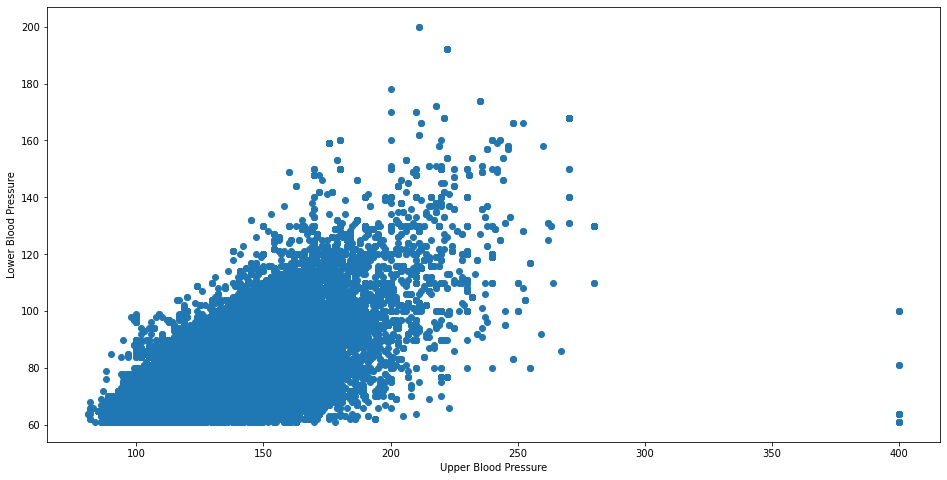

In [42]:
# categorize bps and bpd
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_filtered_bpd['bps'], df_filtered_bpd['bpd'])
ax.set_xlabel('Upper Blood Pressure')
ax.set_ylabel('Lower Blood Pressure')
plt.show()

In [ ]:
# Create bps 
bps = df['bps'].to_numpy()
bps = np.reshape(bps, (1, len(bps)))
bps

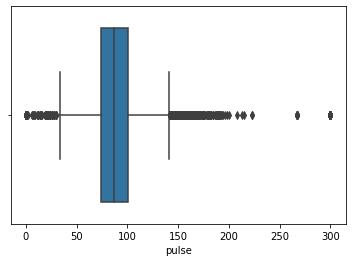

In [13]:
sns.boxplot(x=df['pulse'])

In [49]:
# z-score outlier determination
z = np.abs(stats.zscore(bps, axis=None, ddof=0, nan_policy='omit'))
z

array([[1.2494693 , 1.1359642 , 0.68194379, ..., 0.68011742, 0.68011742,
        0.72551946]])

In [47]:
# np.shape(bps)

(1, 70774)

***Final Product: Confusion matrix predict PDX (classify from vital sign)
(method: Linear SVM)***

In [38]:
# Pulse rate
pr = [85, 83, 85, 84, 84, 84, 82, 82, 83, 84, 82, 80]
np.mean(pr)

83.16666666666667